# Outliers Identification

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

#importing raw data
parsed_data = pd.read_csv("parsed_data.csv")
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72761 entries, 0 to 72760
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72761 non-null  int64  
 1   Unnamed: 0.1    72761 non-null  int64  
 2   Order Date      72761 non-null  object 
 3   Brand           72761 non-null  object 
 4   Sneaker Name    72761 non-null  object 
 5   Release Date    72761 non-null  object 
 6   Shoe Size       72761 non-null  float64
 7   Buyer Region    72761 non-null  object 
 8   Turnover Days   72761 non-null  int64  
 9   Profit          72761 non-null  float64
 10  Profit Ratio    72761 non-null  float64
 11  Model           72761 non-null  object 
 12  Black           72761 non-null  float64
 13  White           72761 non-null  float64
 14  Grey            72761 non-null  float64
 15  Red             72761 non-null  float64
 16  Green           72761 non-null  float64
 17  Neo             72761 non-null 

## Using DBSCAN to identify outliers

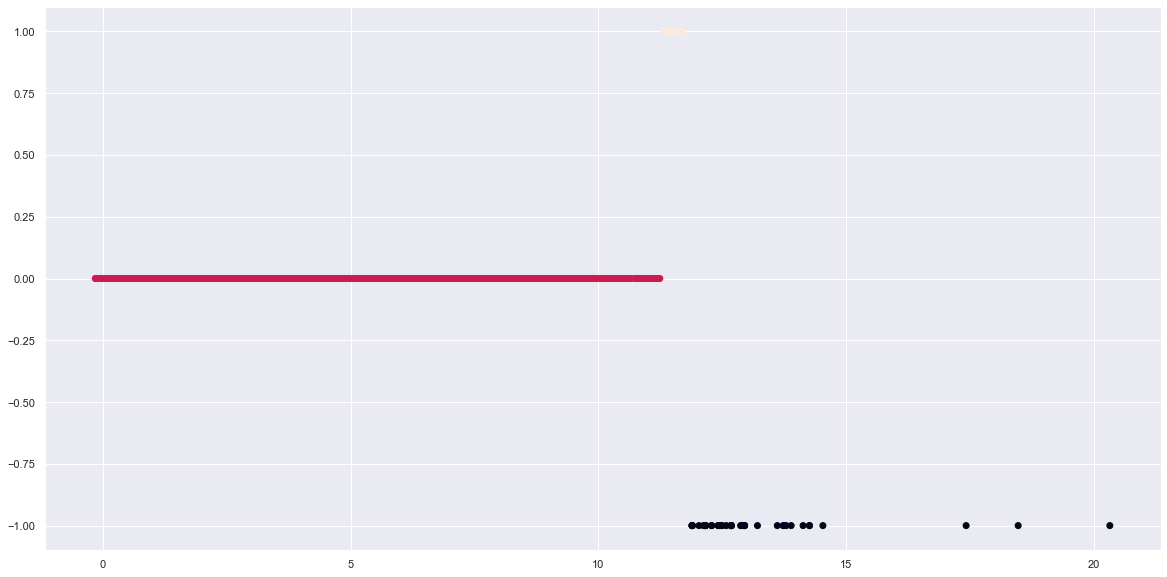

In [3]:
from sklearn.cluster import DBSCAN
base_dbscan=DBSCAN(eps=0.1,min_samples=10) #base model
base_dbscan.fit(parsed_data[['Profit Ratio']])
#plot the bdscan result
plt.figure(figsize=(20,10))
plt.scatter(parsed_data['Profit Ratio'],base_dbscan.labels_,c=base_dbscan.labels_)

### Tune to optimise the DBSCAN parameters

Tuning for Espilon using K-distance graph

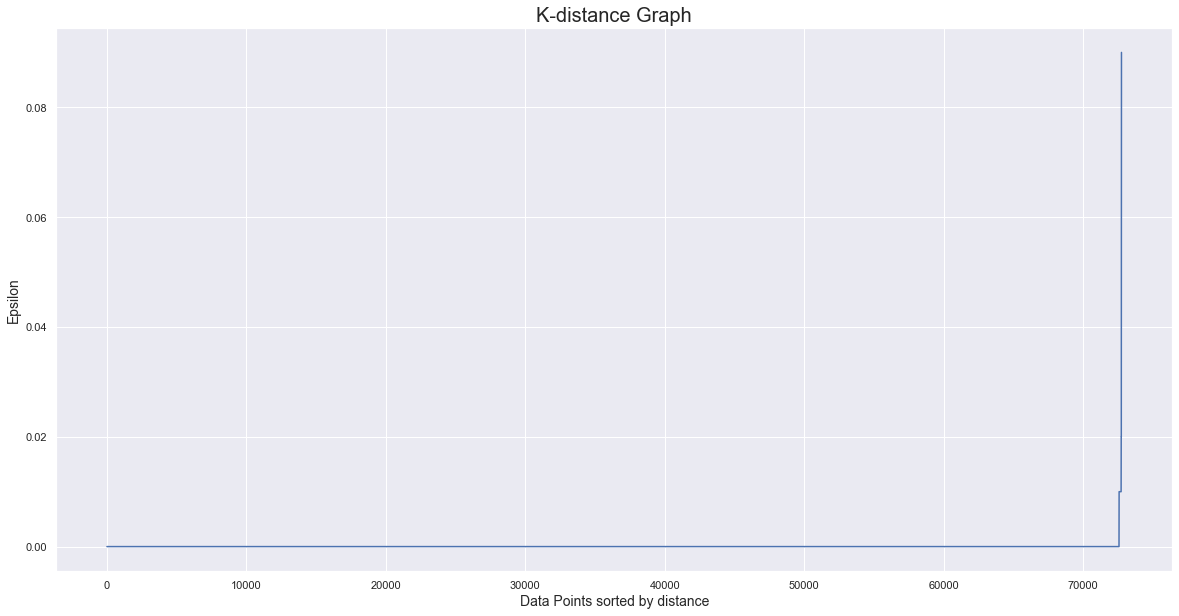

In [4]:
#plotting a k-distance graph
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=46)
nbrs = neigh.fit(parsed_data[['Profit Ratio']])
distances,indices = nbrs.kneighbors(parsed_data[['Profit Ratio']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances[distances<0.1]) #zoom in on epsilon < 0.10
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

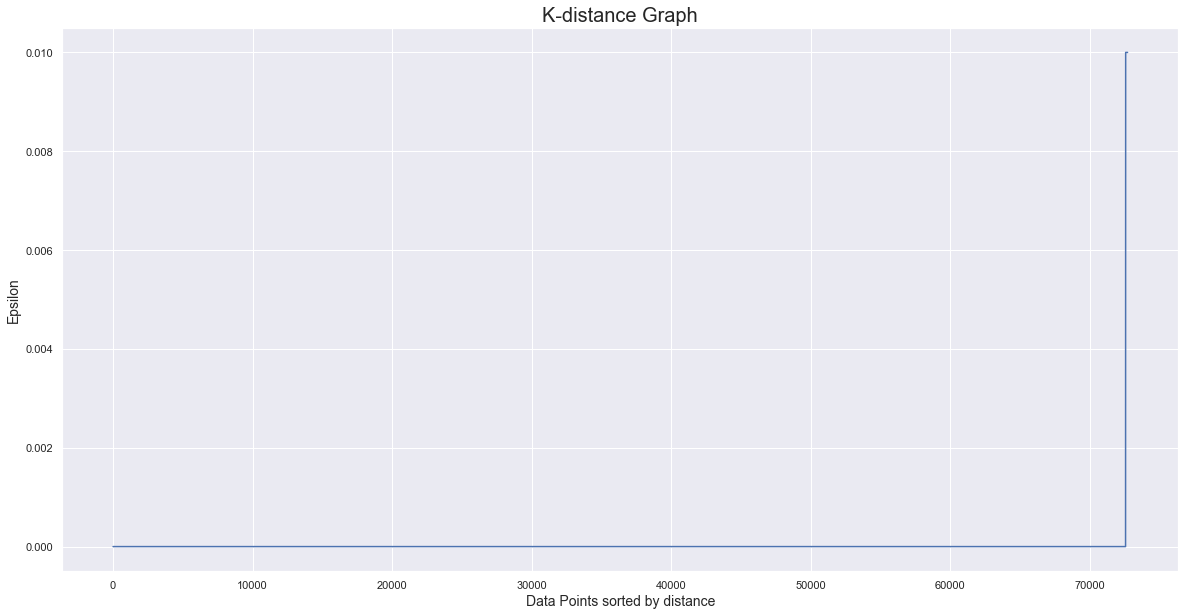

In [4]:
plt.figure(figsize=(20,10))
plt.plot(distances[distances<0.010]) #zoom in on epsilon < 0.01
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#### Optimal Epsilon is at any value > 0.010
#### Optimal min_sample = 2 * data dimensin = 2 * 23 = 46

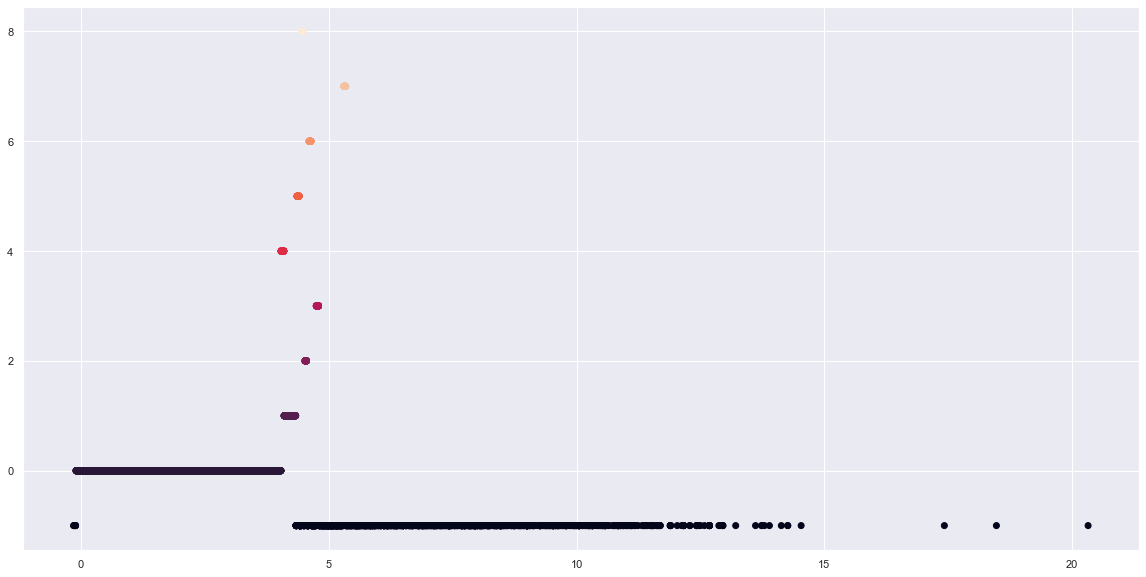

In [5]:
from sklearn.cluster import DBSCAN
optimised_dbscan=DBSCAN(eps=0.011,min_samples=46) 
optimised_dbscan.fit(parsed_data[['Profit Ratio']])
#plot the bdscan result
plt.figure(figsize=(20,10))
plt.scatter(parsed_data['Profit Ratio'],optimised_dbscan.labels_,c=optimised_dbscan.labels_)

In [6]:
outliers = pd.DataFrame(parsed_data[optimised_dbscan.labels_ == -1])
outliers.to_csv('outliers.csv')
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 127 to 72663
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2113 non-null   int64  
 1   Order Date      2113 non-null   object 
 2   Brand           2113 non-null   object 
 3   Sneaker Name    2113 non-null   object 
 4   Release Date    2113 non-null   object 
 5   Shoe Size       2113 non-null   float64
 6   Buyer Region    2113 non-null   object 
 7   Turnover Days   2113 non-null   int64  
 8   Profit          2113 non-null   float64
 9   Profit Ratio    2113 non-null   float64
 10  Model           2113 non-null   object 
 11  Black           535 non-null    float64
 12  White           1835 non-null   float64
 13  Grey            182 non-null    float64
 14  Red             593 non-null    float64
 15  Green           0 non-null      float64
 16  Neo             5 non-null      float64
 17  Orange          48 non-null   

## Data Analysis on outliers

#### Finding the dominant model variant for outliers

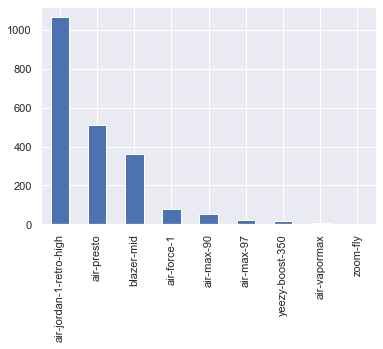

In [7]:
outliers.Model.value_counts().plot(kind='bar')

#### Finding the dominant colour variant for outliers

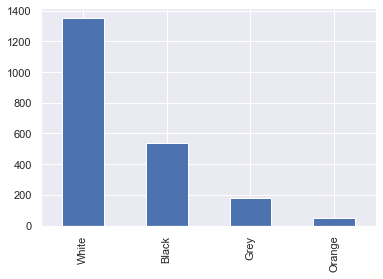

In [8]:
outliers.color.value_counts().plot(kind='bar')

#### comparing the profitability of outliers to entire parsed dataset

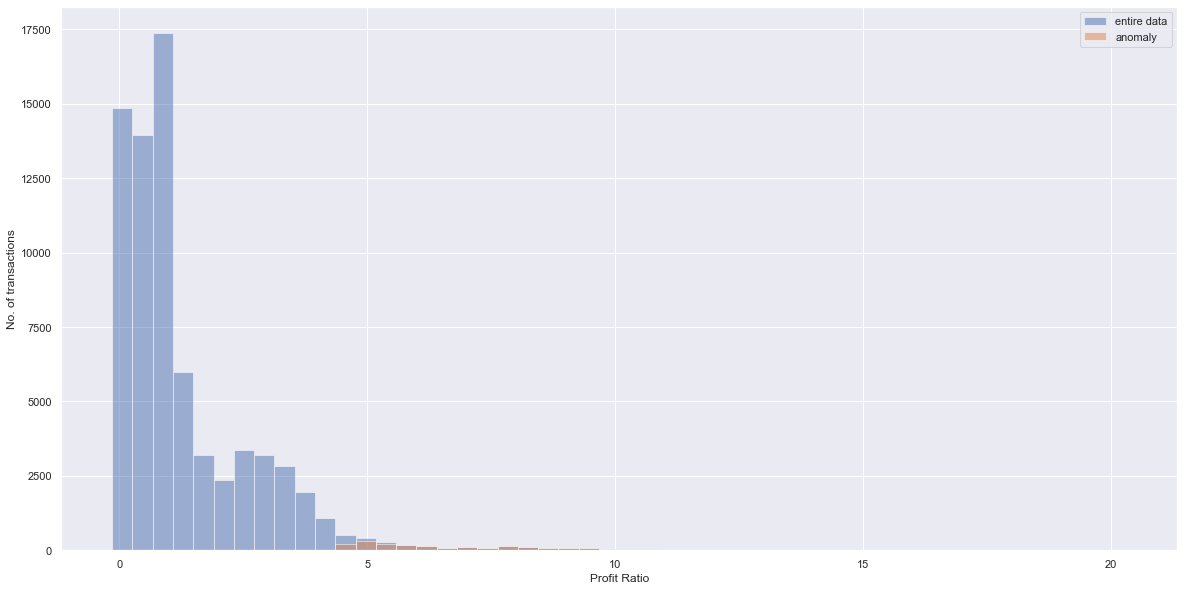

In [9]:
plt.figure(figsize=(20,10))
plt.hist(parsed_data['Profit Ratio'], bins = 50, label = 'entire data', alpha = 0.5)
plt.hist(outliers['Profit Ratio'], bins = 50, label = 'anomaly', alpha = 0.5)
plt.legend(loc = "best")
plt.xlabel('Profit Ratio')
plt.ylabel('No. of transactions')
plt.show()

# Combining Outlier Info into parsed_data

In [10]:
value = [1] * len(outliers)
outliers['$_$'] = value      #outliers denoted as $_$ because thats where the cash lies
outliers.head()

,Unnamed: 0,Order Date,Brand,Sneaker Name,Release Date,Shoe Size,Buyer Region,Turnover Days,Profit,Profit Ratio,...,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Turnover Weeks,color,$_$
127,128,2017-09-07,Off-White,nike-air-max-90-off-white,2017-09-09,8.0,California,-2,1440.0,9.00,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,-0.0,White,1
128,129,2017-09-07,Off-White,nike-air-max-90-off-white,2017-09-09,11.5,New York,-2,930.0,5.81,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,-0.0,White,1
129,130,2017-09-07,Off-White,nike-air-presto-off-white,2017-09-09,10.0,New York,-2,1184.0,7.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0,Black,1
130,131,2017-09-07,Off-White,nike-air-presto-off-white,2017-09-09,10.0,Massachusetts,-2,1165.0,7.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0,Black,1
131,132,2017-09-07,Off-White,nike-air-vapormax-off-white,2017-09-09,12.0,Kentucky,-2,1550.0,6.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0,Black,1


In [11]:
parsed_data = pd.merge(parsed_data,outliers,how='left')
parsed_data.fillna(0,inplace=True)
parsed_data.to_csv('parsed_data.csv')